# Classification trees - Basics

<a target="_blank" href="https://colab.research.google.com/github/concordia-grad-computing-seminars/data-engineering/blob/main/ML/trees/classification_basics.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt
%matplotlib inline

## Synthetic data set

To illustrate the concepts we will use a synthetic data set which we generate using the [`make_moons`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function

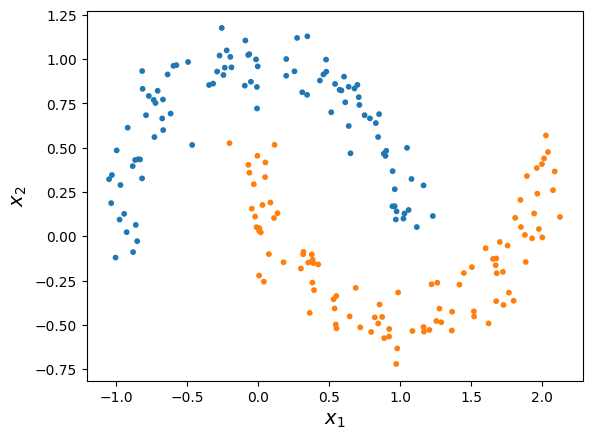

In [2]:
X, y = make_moons(200, noise=0.1, random_state=1)

colors = np.array(['tab:blue', 'tab:orange'])
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y])
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.show()

## Classification tree training

Fitting a classification tree model follows the same syntax as other models in scikit-learn. The class [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) from scikit-learn implements tree regression.

In [3]:
clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

A tree model can be visualized as a sequence of decisions with the [`plot_tree`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) function. For clarity we show only the first two levels.

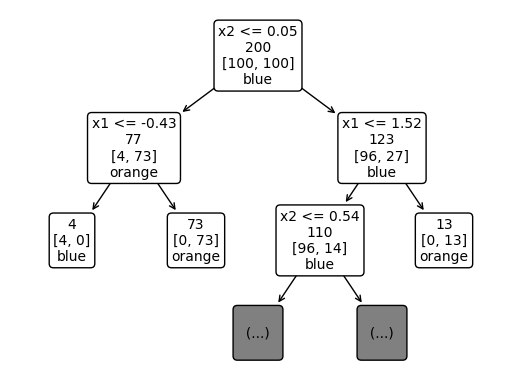

In [4]:
plot_tree(clf, feature_names=['x1', 'x2'], class_names=['blue', 'orange'], label='none', max_depth=2,
          impurity=False, rounded=True, precision=2, fontsize=10) 
plt.show()

In [5]:
def plot_dec_bound(clf, X, y):
    '''
    Plot decision boundaries
    '''
    plot_step = 0.02

    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z-100, cmap=plt.cm.Greens)

    colors = np.array(['tab:blue', 'tab:orange'])
    plt.scatter(X[:, 0], X[:, 1], s=12, color=colors[y])
    
    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$x_2$', fontsize=14)
    plt.show()

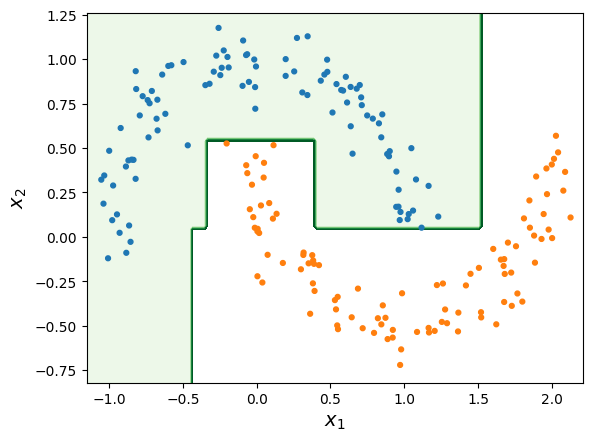

In [6]:
plot_dec_bound(clf, X, y)

## How it works

Trees create a set of regions $R_i$, all distinct, that cover the full data space. In each region $R_i$, the predicted value $y_i$ is the class $k$ which is most present in that region.

The splitting used to create the sets $R_i$, is such as to minimize a chosen loss function $L$, which is the weighed sum of an error measure $H$ of the left and right region. This is the so-called CART (Classification and Regression Trees) algorithm:

$$
L = \frac{m_{left}}{m_{left}+m_{right}} H^{left} + \frac{m_{right}}{m_{left}+m_{right}} H^{right}
$$

where $m_{left}$ and $m_{right}$ are the number of samples within the left, respectively right region of the cut.

In the case of regression trees, this error measure $H$ was for example the squared error SE. In case of classification different error measures exists. Two popular ones are the information entropy and the Gini impurity (default value of the `DecisionTreeClassifier`.

The information entropy of a region $R_i$ is defined as:
$$
H = -\sum_k p_k \log_2 p_k
$$
where $p_k$ is the proportion of samples within that region of class $k$.

The Gini impurity of a region $R_i$ is defined as:
$$
G = 1 - \sum_k p_k^2
$$
where $p_k$ is the proportion of samples within that region of class $k$.

When more than one feature is present (as in our example), the best split is computed for each feature and afterwards the feature leading to the lowest loss is selected (if there is a tie, some convention has to be chosen to select one of them).

## Suggested activities

* Take some time to read the documentation of the [`plot_tree`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) function to understadn the information displayed on the figure.
* Repeat the examples by increasing the `noise` when generating the data set. What do you observe? Can you explain it? 